<a href="https://colab.research.google.com/github/chaeeerish/bootcamp_team/blob/main/deeplearning/sub_clasases_codes/%EC%97%B4%EB%A7%A4_class_2%EA%B0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import keras.utils as image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras.layers import BatchNormalization
import cv2
import matplotlib.pyplot as plt
import os
import random
import glob
from os.path import isdir

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dir = '/content/drive/MyDrive/tree_test/'

In [5]:
name = os.listdir(dir)
name

['잎을 무성하게 그린',
 '잎을 안 무성하게 그린',
 '잎이 없는',
 '잎이 큰',
 '잎이 안 큰',
 '윗쪽으로 뻗는',
 '윗쪽으로 안 뻗는',
 '열매있음',
 '열매없음',
 '그물 아닌',
 '꽃없음',
 '그물',
 '꽃있음']

In [6]:
_1, _2, _3, _4, _5, _6 = [],[],[],[],[],[]
_1.append(os.listdir(dir + '열매있음'))
_2.append(os.listdir(dir +'열매없음'))
# _3.append(os.listdir(dir + '잎이 안 큰'))
# _4.append(os.listdir(dir + '윗쪽으로 안 뻗는'))
# _5.append(os.listdir(dir + '잎을 무성하게 그린'))
# _6.append(os.listdir(dir + '잎을 안 무성하게 그린'))

In [7]:
total_list = []
total_list.append(os.listdir(dir + '열매있음'))
total_list.append(os.listdir(dir +'열매없음'))
# total_list.append(os.listdir(dir + '잎이 안 큰'))
# total_list.append(os.listdir(dir + '윗쪽으로 안 뻗는'))
# total_list.append(os.listdir(dir + '잎을 무성하게 그린'))
# total_list.append(os.listdir(dir + '잎을 안 무성하게 그린'))
# x = set(total_list)
print(total_list)

[['잎13.png', '잎19.png', '잎24.png', '잎20.png', '잎33.png', '잎217.png', '잎229.png', '잎238.png', '잎255.png', '잎289.png', '잎365.png', '잎374.png', '잎376.png', '잎409.png', '잎411.png', '잎410.png', '잎412.png', '잎413.png', '잎414.png', '잎416.png', '잎417.png', '잎415.png', '잎419.png', '잎420.png', '잎424.png', '잎422.png', '잎423.png', '잎426.png', '잎427.png', '잎430.png', '잎431.png', '잎432.png', '잎434.png', '잎435.png', '잎436.png', '잎438.png', '잎437.png', '잎433.png', '잎440.png', '잎439.png', '잎442.png', '잎441.png', '잎445.png', '잎444.png', '잎443.png', '잎446.png', '잎496.png', '잎495.png', '잎493.png', '잎499.png', '잎498.png', '잎497.png', '잎501.png', '잎500.png', '잎503.png', '잎505.png', '잎506.png', '잎504.png', '잎509.png', '잎507.png', '잎508.png', '잎510.png', '잎513.png', '잎512.png', '잎511.png', '잎516.png', '잎515.png', '잎517.png', '잎518.png', '잎514.png', '잎519.png', '잎520.p

In [8]:
total_list = np.concatenate(total_list).tolist()
print(total_list)

['잎13.png', '잎19.png', '잎24.png', '잎20.png', '잎33.png', '잎217.png', '잎229.png', '잎238.png', '잎255.png', '잎289.png', '잎365.png', '잎374.png', '잎376.png', '잎409.png', '잎411.png', '잎410.png', '잎412.png', '잎413.png', '잎414.png', '잎416.png', '잎417.png', '잎415.png', '잎419.png', '잎420.png', '잎424.png', '잎422.png', '잎423.png', '잎426.png', '잎427.png', '잎430.png', '잎431.png', '잎432.png', '잎434.png', '잎435.png', '잎436.png', '잎438.png', '잎437.png', '잎433.png', '잎440.png', '잎439.png', '잎442.png', '잎441.png', '잎445.png', '잎444.png', '잎443.png', '잎446.png', '잎496.png', '잎495.png', '잎493.png', '잎499.png', '잎498.png', '잎497.png', '잎501.png', '잎500.png', '잎503.png', '잎505.png', '잎506.png', '잎504.png', '잎509.png', '잎507.png', '잎508.png', '잎510.png', '잎513.png', '잎512.png', '잎511.png', '잎516.png', '잎515.png', '잎517.png', '잎518.png', '잎514.png', '잎519.png', '잎520.pn

In [9]:
_1 = np.concatenate(_1).tolist()
_2 = np.concatenate(_2).tolist()
# _3 = np.concatenate(_3).tolist()
# _4 = np.concatenate(_4).tolist()
# _5 = np.concatenate(_5).tolist()
# _6 = np.concatenate(_6).tolist()

In [10]:
df = pd.DataFrame({
    'imgs' : total_list
})

In [11]:
df1 = pd.DataFrame({
    '_1' : _1
})
df2 = pd.DataFrame({
    '_2' : _2
})
# df3 = pd.DataFrame({
#     '_3' : _3
# })
# df4 = pd.DataFrame({
#     '_4' : _4
# })
# df5 = pd.DataFrame({
#     '_5' : _5
# })
# df6 = pd.DataFrame({
#     '_6' : _6
# })

In [12]:
result = pd.merge(df,df1, how='left', left_on='imgs', right_on='_1')
result = pd.merge(result,df2, how='left', left_on='imgs', right_on='_2')
# result = pd.merge(result,df3, how='left', left_on='imgs', right_on='_3')
# result = pd.merge(result,df4, how='left', left_on='imgs', right_on='_4')
# result = pd.merge(result,df5, how='left', left_on='imgs', right_on='_5')
# result = pd.merge(result,df6, how='left', left_on='imgs', right_on='_6')

In [13]:
result = result.fillna(0)

In [14]:
result

,imgs,_1,_2
0,잎13.png,잎13.png,0
1,잎19.png,잎19.png,0
2,잎24.png,잎24.png,0
3,잎20.png,잎20.png,0
4,잎33.png,잎33.png,0
...,...,...,...
193,전체781.png,0,전체781.png
194,전체782.png,0,전체782.png
195,전체784.png,0,전체784.png
196,전체783.png,0,전체783.png


In [18]:
def binary(data):
    if data != 0:
        data = 1
        return data
    else:
        return data
result['_1'] = result['_1'].apply(binary)
result['_2'] = result['_2'].apply(binary)
# result['_3'] = result['_3'].apply(binary)
# result['_4'] = result['_4'].apply(binary)
# result['_5'] = result['_5'].apply(binary)
# result['_6'] = result['_6'].apply(binary)

In [19]:
result

,imgs,_1,_2
0,잎13.png,1,0
1,잎19.png,1,0
2,잎24.png,1,0
3,잎20.png,1,0
4,잎33.png,1,0
...,...,...,...
193,전체781.png,0,1
194,전체782.png,0,1
195,전체784.png,0,1
196,전체783.png,0,1


In [20]:
result.columns = ['imgs','열매있음', '열매없음']

In [21]:
result1 = result.copy()

In [ ]:
# def chage(data):
#     if data == 1:
#         data = 0
#         return data
#     else:
#         data = 1
#         return data
# result1['잎을 무성하게 그린'] = result1['잎을 무성하게 그린'].apply(chage)

# result['_2'] = result['_2'].apply(binary)
# result['_3'] = result['_3'].apply(binary)

In [ ]:
# def chage2(data):
#     if data == 1:
#         data = 2
#         return data
#     else:
#         data = 0
#         return data
# result['잎을 안 무성하게 그린'] = result['잎을 안 무성하게 그린'].apply(chage2)

In [ ]:
result1.iloc[101:120]

,imgs,윗쪽으로 안 뻗는,윗쪽으로 뻗는


In [22]:
data_1 = result1[['imgs','열매있음']]
data_1.columns = ['imgs','잎']

In [23]:
data_1

,imgs,잎
0,잎13.png,1
1,잎19.png,1
2,잎24.png,1
3,잎20.png,1
4,잎33.png,1
...,...,...
193,전체781.png,0
194,전체782.png,0
195,전체784.png,0
196,전체783.png,0


In [24]:
data_1['잎'].value_counts()

0    102
1     96
Name: 잎, dtype: int64

In [25]:
import sklearn
data_merge2_shuffled = sklearn.utils.shuffle(data_1)

In [26]:
data_merge2_shuffled

,imgs,잎
2,잎24.png,1
128,잎250.png,0
77,잎530.png,1
194,전체782.png,0
98,잎218.png,0
...,...,...
193,전체781.png,0
69,잎514.png,1
5,잎217.png,1
192,전체827.png,0


In [27]:
data = data_merge2_shuffled

In [28]:
train_df, test_df = train_test_split(data, test_size=0.2, random_state=1, stratify=data['잎'])

In [29]:
#확인
print("Train set rows: {}".format(train_df.shape[0]))
print("Test  set rows: {}".format(test_df.shape[0]))

Train set rows: 158
Test  set rows: 40


In [30]:
IMAGE_PATH = '/content/drive/MyDrive/total/'

In [31]:
def read_image(file_name):
  # print(file_name)
  image = cv2.imread(IMAGE_PATH + file_name)
  image = cv2.resize(image, dsize=(300, 300))
  # print(image.shape)
  return image[:,:,:3]

In [32]:
def categories_encoder(dataset):
    #file명을 읽어 이미지 경로에서 불러온다. X 값.
    X = np.stack(dataset['imgs'].apply(read_image))
    # subspecies를 더미변수화 하여 y값으로
    y = pd.get_dummies(dataset['잎'], drop_first=False)
    return X, y

In [33]:
#file명을 읽어 이미지 경로에서 불러온다. X 값.
X_train, y_train = categories_encoder(train_df)
X_test, y_test = categories_encoder(test_df)

In [34]:
#개수, size, channel
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(158, 300, 300, 3)
(158, 2)
(40, 300, 300, 3)
(40, 2)


In [35]:
#하이퍼 파라미터 생성
BATCH_SIZE = 7 # 한 번에 처리할 데이터량 설정
EPOCHS = 20 # 신경망을 학습할 횟수
VERBOSE = 1 # 학습 진행 상황 출력 모드 설정 

In [36]:
!pip install -U efficientnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 KB 8.1 MB/s eta 0:00:00


In [37]:
import numpy as np
import pandas as pd
from skimage.io import imread
import matplotlib.pyplot as plt
import efficientnet.keras as efn 
import keras 
from keras.models import Model

from keras.applications.imagenet_utils import decode_predictions

from efficientnet.keras import EfficientNetB0, EfficientNetB3
from efficientnet.keras import center_crop_and_resize, preprocess_input

## if you use tensorflow.keras: 
# from efficientnet.tfkeras import EfficientNetB0
# from efficientnet.tfkeras import center_crop_and_resize, preprocess_input

import os

In [38]:
base_model = efn.EfficientNetB3(weights='imagenet') #imagenet 가중치 사용

50086816/50086816 [==============================] - 2s 0us/step


In [39]:
#output layer 변경
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
net = Dense(2, activation='softmax')(base_model.layers[-2].output)

In [40]:
# model = Model(inputs=base_model.input, outputs=net)


model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(300,300,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 296, 296, 16)      1216      
                                                                 
 batch_normalization (BatchN  (None, 296, 296, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 148, 148, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 148, 148, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 144, 144, 32)      12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 72, 72, 32)       0

In [41]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 296, 296, 16)      1216      
                                                                 
 batch_normalization (BatchN  (None, 296, 296, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 148, 148, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 148, 148, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 144, 144, 32)      12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 72, 72, 32)       0

In [43]:
%mkdir /content/drive/MyDrive/models/
%mkdir /content/drive/MyDrive/models/열매/
%mkdir /content/drive/MyDrive/models/열매/check_point
checkpoint_path = "/content/drive/MyDrive/models/열매/check_point/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

mkdir: cannot create directory ‘/content/drive/MyDrive/models/’: File exists


In [44]:
from keras.callbacks import EarlyStopping 
early_stopping = EarlyStopping(patience=30)
cp_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    save_freq=7*10)

history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=6,
    verbose=VERBOSE,
    validation_split=0.2,
    callbacks=[early_stopping, cp_callback]
)

Epoch 1/200
21/21 [==============================] - 13s 30ms/step - loss: 4.2153 - accuracy: 0.5159 - val_loss: 1.4517 - val_accuracy: 0.4688
Epoch 2/200
21/21 [==============================] - 0s 11ms/step - loss: 3.2125 - accuracy: 0.6508 - val_loss: 5.4808 - val_accuracy: 0.5312
Epoch 3/200
21/21 [==============================] - 0s 12ms/step - loss: 5.5620 - accuracy: 0.5794 - val_loss: 3.6668 - val_accuracy: 0.7500
Epoch 4/200
 1/21 [>.............................] - ETA: 0s - loss: 1.2344 - accuracy: 0.8333
Epoch 4: saving model to /content/drive/MyDrive/models/열매/check_point/cp-0004.ckpt
21/21 [==============================] - 0s 23ms/step - loss: 3.1061 - accuracy: 0.6667 - val_loss: 3.4203 - val_accuracy: 0.7188
Epoch 5/200
21/21 [==============================] - 0s 11ms/step - loss: 3.9836 - accuracy: 0.7381 - val_loss: 0.4828 - val_accuracy: 0.9062
Epoch 6/200
21/21 [==============================] - 0s 12ms/step - loss: 2.7317 - accuracy: 0.6905 - val_loss: 6.8971 - va

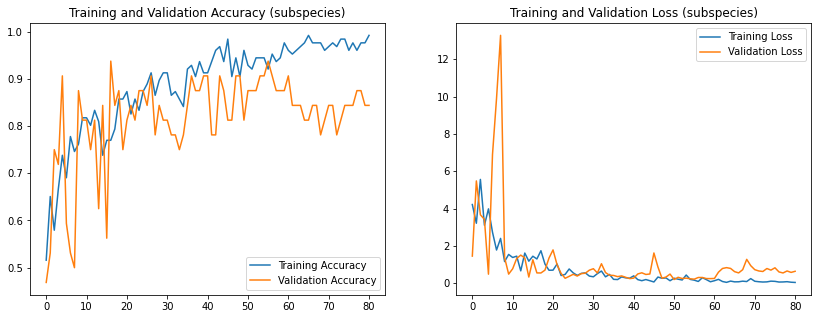

In [45]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy (subspecies)')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss (subspecies)')

plt.show()

In [46]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 58ms/step - loss: 0.4499 - accuracy: 0.8250


[0.4499451220035553, 0.824999988079071]

In [47]:
predictions = model.predict(X_test)

2/2 [==============================] - 0s 6ms/step


In [48]:
np.argmax(predictions[2])

0

In [ ]:
y_test

,0,1
43,0,1
34,0,1
88,1,0
62,1,0
28,0,1
24,0,1
95,1,0
17,0,1
89,1,0
14,0,1


In [49]:
%cd /content/drive/MyDrive/models/열매/
from keras.models import load_model
model.save('열매_model.h5')

/content/drive/MyDrive/models/열매
